In [1]:
import sys
import time
import math
sys.path.insert(0, r'/home/danis/work/python_works/gamma_4/Scripts')
sys.path.insert(0, r'D:\Учеба\Практика\Диплом\gamma_4\Scripts')
import numpy as np
import pandas as pd
from materials import*
import matplotlib.pyplot as plt

Минимальная энергия: 1e-3
windows (w) or linux (l): l


Параметры пучков и спектры

In [6]:
linspace1 = np.linspace(0.035, 0.1, 25, dtype=np.float32)
linspace2 = np.geomspace(0.11, 3, 25, dtype=np.float32)

beams_energyes = []
beams_energyes.extend(linspace1)
beams_energyes.extend(linspace2)

In [7]:
m = 80
target = R(Material(m), 0.01)

brems = [target.brem(beams_energy) for beams_energy in beams_energyes]
brems_e = [brem * en for brem in brems]

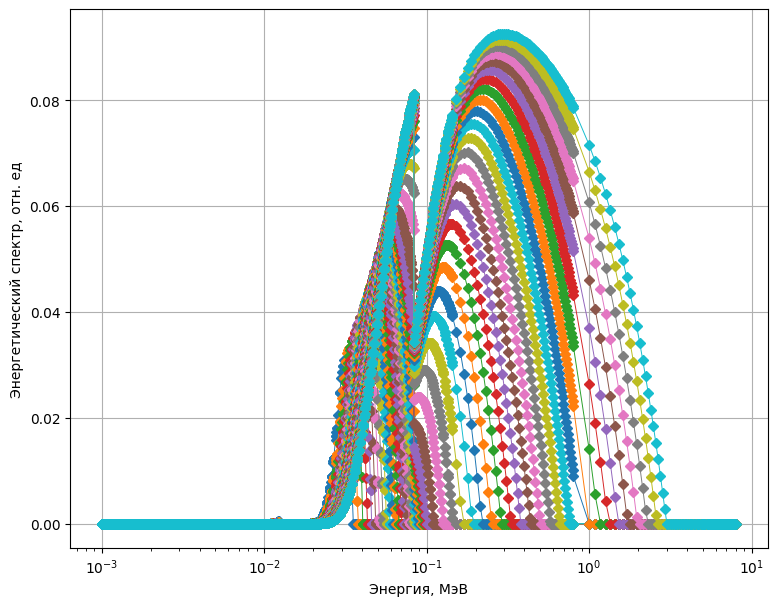

In [8]:
fig, ax = plt.subplots(figsize=(9, 7))

for br in brems_e:
    ax.plot(en, br, ls='-', marker='D', lw='0.7', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)

ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1e-3, 0.1e0)
# ax.set_ylim(1e-7, 1.2)

ax.grid(True)

# fig.savefig('Тормозной спектр.jpg', bbox_inches='tight')

Номер первого канала и К-скачки

In [9]:
n = 11

In [10]:
# Индексы К скачков
EDGE = []
for i in range(1, len(en)):
    if en[i - 1] == en[i]:
        EDGE.append(i - 1)

In [11]:
EDGE.remove(EDGE[EDGE.index(Material(m).k_index())])

Уровни пропускания в К-крае

In [12]:
linspace3 = np.linspace(0.001, 0.9, 51)
for i, val in enumerate(linspace3):
    linspace3[i] = round(val, 5)
    
levels = []
levels.extend(linspace3)

Спектральные характеристики чувствительности каналов

In [13]:
def ross_by_k_level(num_1, num_2, level):
    t_2 = Material(num_2).lt(level)
    f_2 = R(Material(num_2), Material(num_2).lt(level)).f()
    t_1 = Material(num_1).lt(R(Material(num_2), Material(num_2).lt(level)).f()[Material(num_1).k_index()])
    f_1 = R(Material(num_1), t_1).f()
    return f_2 - f_1

In [14]:
resp_ross = []

start_time = time.time()
for ind, j in enumerate(levels):
    print(f'({ind}), время: {round(time.time() - start_time, 5)}, секунд')
    resp = []
    for i in range(n, 100):
        resp.append(ross_by_k_level(i, i+1, j))
    resp_ross.append(resp)

(0), время: 0.00016, секунд
(1), время: 3.45108, секунд
(2), время: 6.69538, секунд
(3), время: 9.93059, секунд
(4), время: 13.07195, секунд
(5), время: 16.14728, секунд
(6), время: 19.20068, секунд
(7), время: 22.25719, секунд
(8), время: 25.33302, секунд
(9), время: 28.38006, секунд
(10), время: 31.42615, секунд
(11), время: 34.47861, секунд
(12), время: 37.5122, секунд
(13), время: 40.55916, секунд
(14), время: 43.61123, секунд
(15), время: 46.64543, секунд
(16), время: 49.69344, секунд
(17), время: 52.73988, секунд
(18), время: 55.77318, секунд
(19), время: 58.80807, секунд
(20), время: 61.82482, секунд
(21), время: 64.87164, секунд
(22), время: 67.97143, секунд
(23), время: 71.06168, секунд
(24), время: 74.09613, секунд
(25), время: 77.12601, секунд
(26), время: 80.18398, секунд
(27), время: 83.24502, секунд
(28), время: 86.31186, секунд
(29), время: 89.33921, секунд
(30), время: 92.39044, секунд
(31), время: 95.44723, секунд
(32), время: 98.52368, секунд
(33), время: 101.56872, с

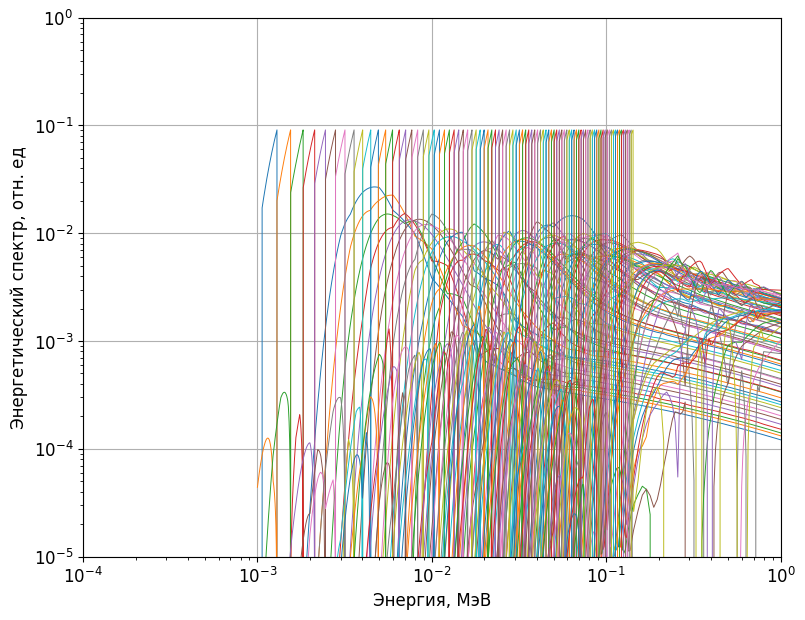

In [15]:
fig, ax = plt.subplots(figsize=(9, 7))

for i in resp_ross[5]:
    ax.plot(en, i, ls='-', lw='0.7', ms=5)

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=12)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-4, 1e0)
ax.set_ylim(1e-5, 1e0)
ax.grid(True)

Матрицы задач

In [16]:
from garipov_deconvolution import get_coeff_simpson

In [17]:
Matrixs = []

start_time = time.time()

for i in range(len(resp_ross)):
    print(f'({i}), время: {round(time.time() - start_time, 5)} секунд')
    matrix = []
    
    for response in resp_ross[i]:
        matrix.append(get_coeff_simpson(response, en, EDGE)[0])
    
    Matrixs.append(matrix)

(0), время: 0.00017 секунд
(1), время: 2.67272 секунд
(2), время: 5.41277 секунд
(3), время: 8.05783 секунд
(4), время: 10.67498 секунд
(5), время: 13.30396 секунд
(6), время: 15.98396 секунд
(7), время: 18.57467 секунд
(8), время: 21.26077 секунд
(9), время: 23.96405 секунд
(10), время: 26.60587 секунд
(11), время: 29.34602 секунд
(12), время: 32.09806 секунд
(13), время: 34.70538 секунд
(14), время: 37.38963 секунд
(15), время: 40.01825 секунд
(16), время: 42.66929 секунд
(17), время: 45.40318 секунд
(18), время: 48.13038 секунд
(19), время: 50.70692 секунд
(20), время: 53.30139 секунд
(21), время: 55.92871 секунд
(22), время: 60.30543 секунд
(23), время: 66.97371 секунд
(24), время: 74.07009 секунд
(25), время: 80.68177 секунд
(26), время: 87.31238 секунд
(27), время: 93.63926 секунд
(28), время: 100.01485 секунд
(29), время: 106.3965 секунд
(30), время: 112.9053 секунд
(31), время: 119.0379 секунд
(32), время: 125.4533 секунд
(33), время: 131.68416 секунд
(34), время: 138.19711 сек

Сигналы измерительных каналов

In [18]:
new_en = get_coeff_simpson(resp_ross[0][0], en, EDGE)[1]

In [19]:
def signals_from_one_spectrum(spectrum):
    
    start_time = time.time()
    signals_simpson = []
    
    # для каждой матрицы
    for i, matrix in enumerate(Matrixs):
        print(f'({i}), время: {round(time.time() - start_time, 5)} секунд')
        
        # сигналы для каждой задачи
        signals = []
        
        # для каждой строки в матрице
        for row in matrix:
            # значение одного сигнала
            signal = sum(row * np.interp(new_en, en, spectrum))
            signals.append(signal)
            
        signals_simpson.append(signals)
        
    return signals_simpson

Сигналы для каждого спектра

In [20]:
spectrums_signals = []

for spectrum in brems_e:
    spectrums_signals.append(signals_from_one_spectrum(spectrum))

(0), время: 0.0 секунд
(1), время: 0.11136 секунд
(2), время: 0.19404 секунд
(3), время: 0.26102 секунд
(4), время: 0.3227 секунд
(5), время: 0.3867 секунд
(6), время: 0.45022 секунд
(7), время: 0.53824 секунд
(8), время: 0.59806 секунд
(9), время: 0.7185 секунд
(10), время: 0.79275 секунд
(11), время: 0.85765 секунд
(12), время: 0.923 секунд
(13), время: 1.01972 секунд
(14), время: 1.10794 секунд
(15), время: 1.16584 секунд
(16), время: 1.25322 секунд
(17), время: 1.32353 секунд
(18), время: 1.3888 секунд
(19), время: 1.47557 секунд
(20), время: 1.54542 секунд
(21), время: 1.60793 секунд
(22), время: 1.66983 секунд
(23), время: 1.76622 секунд
(24), время: 1.83089 секунд
(25), время: 1.89364 секунд
(26), время: 1.95702 секунд
(27), время: 2.02746 секунд
(28), время: 2.12817 секунд
(29), время: 2.18454 секунд
(30), время: 2.24659 секунд
(31), время: 2.31323 секунд
(32), время: 2.39854 секунд
(33), время: 2.45596 секунд
(34), время: 2.53454 секунд
(35), время: 2.59715 секунд
(36), время:

(44), время: 3.37968 секунд
(45), время: 3.43793 секунд
(46), время: 3.49762 секунд
(47), время: 3.56155 секунд
(48), время: 3.62906 секунд
(49), время: 3.74707 секунд
(50), время: 3.8029 секунд
(0), время: 0.0 секунд
(1), время: 0.06036 секунд
(2), время: 0.12006 секунд
(3), время: 0.18968 секунд
(4), время: 0.267 секунд
(5), время: 0.39134 секунд
(6), время: 0.45421 секунд
(7), время: 0.5253 секунд
(8), время: 0.58297 секунд
(9), время: 0.64807 секунд
(10), время: 0.71038 секунд
(11), время: 0.80699 секунд
(12), время: 0.87615 секунд
(13), время: 0.93375 секунд
(14), время: 0.99172 секунд
(15), время: 1.05378 секунд
(16), время: 1.12111 секунд
(17), время: 1.1804 секунд
(18), время: 1.24054 секунд
(19), время: 1.34757 секунд
(20), время: 1.48448 секунд
(21), время: 1.55866 секунд
(22), время: 1.62031 секунд
(23), время: 1.68405 секунд
(24), время: 1.74447 секунд
(25), время: 1.84459 секунд
(26), время: 1.91764 секунд
(27), время: 1.97824 секунд
(28), время: 2.04182 секунд
(29), время

(36), время: 2.84308 секунд
(37), время: 2.90906 секунд
(38), время: 2.96447 секунд
(39), время: 3.02882 секунд
(40), время: 3.137 секунд
(41), время: 3.21656 секунд
(42), время: 3.2783 секунд
(43), время: 3.3408 секунд
(44), время: 3.46409 секунд
(45), время: 3.53376 секунд
(46), время: 3.61922 секунд
(47), время: 3.75158 секунд
(48), время: 3.82233 секунд
(49), время: 3.92112 секунд
(50), время: 3.9807 секунд
(0), время: 0.0 секунд
(1), время: 0.06545 секунд
(2), время: 0.12693 секунд
(3), время: 0.23052 секунд
(4), время: 0.36055 секунд
(5), время: 0.42964 секунд
(6), время: 0.4963 секунд
(7), время: 0.55887 секунд
(8), время: 0.61751 секунд
(9), время: 0.70805 секунд
(10), время: 0.78523 секунд
(11), время: 0.88904 секунд
(12), время: 0.99017 секунд
(13), время: 1.07025 секунд
(14), время: 1.12743 секунд
(15), время: 1.18565 секунд
(16), время: 1.25965 секунд
(17), время: 1.31771 секунд
(18), время: 1.37544 секунд
(19), время: 1.43375 секунд
(20), время: 1.54937 секунд
(21), время:

(27), время: 2.35852 секунд
(28), время: 2.42648 секунд
(29), время: 2.49421 секунд
(30), время: 2.56311 секунд
(31), время: 2.63021 секунд
(32), время: 2.69458 секунд
(33), время: 2.79425 секунд
(34), время: 2.92664 секунд
(35), время: 3.05785 секунд
(36), время: 3.13017 секунд
(37), время: 3.23821 секунд
(38), время: 3.33007 секунд
(39), время: 3.46207 секунд
(40), время: 3.59753 секунд
(41), время: 3.72829 секунд
(42), время: 3.82274 секунд
(43), время: 3.89278 секунд
(44), время: 3.94912 секунд
(45), время: 4.02999 секунд
(46), время: 4.15886 секунд
(47), время: 4.27075 секунд
(48), время: 4.33683 секунд
(49), время: 4.4723 секунд
(50), время: 4.59862 секунд
(0), время: 1e-05 секунд
(1), время: 0.05687 секунд
(2), время: 0.15638 секунд
(3), время: 0.27279 секунд
(4), время: 0.32938 секунд
(5), время: 0.41977 секунд
(6), время: 0.50472 секунд
(7), время: 0.56343 секунд
(8), время: 0.63286 секунд
(9), время: 0.72237 секунд
(10), время: 0.85192 секунд
(11), время: 0.91387 секунд
(12),

(20), время: 1.65398 секунд
(21), время: 1.71748 секунд
(22), время: 1.78006 секунд
(23), время: 1.8377 секунд
(24), время: 1.91161 секунд
(25), время: 1.96675 секунд
(26), время: 2.02788 секунд
(27), время: 2.0903 секунд
(28), время: 2.15053 секунд
(29), время: 2.26885 секунд
(30), время: 2.38185 секунд
(31), время: 2.44321 секунд
(32), время: 2.50369 секунд
(33), время: 2.5628 секунд
(34), время: 2.62253 секунд
(35), время: 2.68383 секунд
(36), время: 2.74407 секунд
(37), время: 2.80629 секунд
(38), время: 2.87098 секунд
(39), время: 2.92961 секунд
(40), время: 3.05049 секунд
(41), время: 3.1211 секунд
(42), время: 3.1817 секунд
(43), время: 3.24275 секунд
(44), время: 3.30422 секунд
(45), время: 3.36387 секунд
(46), время: 3.45894 секунд
(47), время: 3.52054 секунд
(48), время: 3.5875 секунд
(49), время: 3.6454 секунд
(50), время: 3.71529 секунд
(0), время: 1e-05 секунд
(1), время: 0.05822 секунд
(2), время: 0.11512 секунд
(3), время: 0.17308 секунд
(4), время: 0.25951 секунд
(5), в

(11), время: 0.7601 секунд
(12), время: 0.82316 секунд
(13), время: 0.8859 секунд
(14), время: 0.95601 секунд
(15), время: 1.03554 секунд
(16), время: 1.10977 секунд
(17), время: 1.17052 секунд
(18), время: 1.23311 секунд
(19), время: 1.33784 секунд
(20), время: 1.39401 секунд
(21), время: 1.45016 секунд
(22), время: 1.50637 секунд
(23), время: 1.56367 секунд
(24), время: 1.6807 секунд
(25), время: 1.81197 секунд
(26), время: 1.87844 секунд
(27), время: 1.94136 секунд
(28), время: 2.00502 секунд
(29), время: 2.07214 секунд
(30), время: 2.17201 секунд
(31), время: 2.23144 секунд
(32), время: 2.29118 секунд
(33), время: 2.35882 секунд
(34), время: 2.421 секунд
(35), время: 2.48446 секунд
(36), время: 2.56156 секунд
(37), время: 2.69085 секунд
(38), время: 2.76008 секунд
(39), время: 2.82434 секунд
(40), время: 2.8869 секунд
(41), время: 2.94944 секунд
(42), время: 3.00903 секунд
(43), время: 3.07271 секунд
(44), время: 3.20376 секунд
(45), время: 3.26618 секунд
(46), время: 3.381 секунд


(2), время: 0.16019 секунд
(3), время: 0.22392 секунд
(4), время: 0.2912 секунд
(5), время: 0.35285 секунд
(6), время: 0.4384 секунд
(7), время: 0.5645 секунд
(8), время: 0.63726 секунд
(9), время: 0.77264 секунд
(10), время: 0.90048 секунд
(11), время: 1.00393 секунд
(12), время: 1.06762 секунд
(13), время: 1.15773 секунд
(14), время: 1.25613 секунд
(15), время: 1.3195 секунд
(16), время: 1.38263 секунд
(17), время: 1.47407 секунд
(18), время: 1.54849 секунд
(19), время: 1.60533 секунд
(20), время: 1.66357 секунд
(21), время: 1.74869 секунд
(22), время: 1.85529 секунд
(23), время: 1.91137 секунд
(24), время: 1.96921 секунд
(25), время: 2.03 секунд
(26), время: 2.09243 секунд
(27), время: 2.19145 секунд
(28), время: 2.27628 секунд
(29), время: 2.33297 секунд
(30), время: 2.39029 секунд
(31), время: 2.44844 секунд
(32), время: 2.54407 секунд
(33), время: 2.63717 секунд
(34), время: 2.69589 секунд
(35), время: 2.75316 секунд
(36), время: 2.81025 секунд
(37), время: 2.86762 секунд
(38), в

(46), время: 3.32836 секунд
(47), время: 3.39205 секунд
(48), время: 3.51392 секунд
(49), время: 3.6057 секунд
(50), время: 3.66942 секунд
(0), время: 1e-05 секунд
(1), время: 0.07549 секунд
(2), время: 0.13339 секунд
(3), время: 0.1964 секунд
(4), время: 0.25992 секунд
(5), время: 0.35625 секунд
(6), время: 0.41372 секунд
(7), время: 0.47377 секунд
(8), время: 0.53771 секунд
(9), время: 0.6037 секунд
(10), время: 0.69826 секунд
(11), время: 0.76296 секунд
(12), время: 0.83037 секунд
(13), время: 0.8942 секунд
(14), время: 0.96751 секунд
(15), время: 1.0369 секунд
(16), время: 1.10034 секунд
(17), время: 1.16397 секунд
(18), время: 1.23546 секунд
(19), время: 1.3733 секунд
(20), время: 1.43282 секунд
(21), время: 1.49227 секунд
(22), время: 1.55547 секунд
(23), время: 1.61948 секунд
(24), время: 1.67999 секунд
(25), время: 1.73708 секунд
(26), время: 1.84278 секунд
(27), время: 1.97145 секунд
(28), время: 2.10392 секунд
(29), время: 2.1819 секунд
(30), время: 2.24541 секунд
(31), время

(37), время: 2.78008 секунд
(38), время: 2.8596 секунд
(39), время: 2.9158 секунд
(40), время: 2.97654 секунд
(41), время: 3.04155 секунд
(42), время: 3.10303 секунд
(43), время: 3.15771 секунд
(44), время: 3.21843 секунд
(45), время: 3.28096 секунд
(46), время: 3.34373 секунд
(47), время: 3.40585 секунд
(48), время: 3.46264 секунд
(49), время: 3.56436 секунд
(50), время: 3.62621 секунд
(0), время: 1e-05 секунд
(1), время: 0.06098 секунд
(2), время: 0.12715 секунд
(3), время: 0.22269 секунд
(4), время: 0.27795 секунд
(5), время: 0.33558 секунд
(6), время: 0.40505 секунд
(7), время: 0.46561 секунд
(8), время: 0.52569 секунд
(9), время: 0.60276 секунд
(10), время: 0.66445 секунд
(11), время: 0.72496 секунд
(12), время: 0.78518 секунд
(13), время: 0.88752 секунд
(14), время: 1.01769 секунд
(15), время: 1.15272 секунд
(16), время: 1.2791 секунд
(17), время: 1.35128 секунд
(18), время: 1.40978 секунд
(19), время: 1.46567 секунд
(20), время: 1.5226 секунд
(21), время: 1.6323 секунд
(22), вре

Восстановление спектров

In [21]:
from garipov_deconvolution import Gold

In [22]:
def deconvolution_one_spectrum(spectrum, signals_from_this_spectrum):
    
    sp = [0 for i in range(len(resp_ross))]
    dev = [0 for i in range(len(resp_ross))]
    norm = [0 for i in range(len(resp_ross))]
    
    start_time = time.time()
    
    for i in range(len(resp_ross)):
        print(f'({i}), время: {round(time.time() - start_time, 5)} секунд')
        sp[i], norm[i], dev[i] = Gold(Matrixs[i], signals_from_this_spectrum[i], en, spectrum, new_en, 1, 10000, w=True, d=False)[:3]
    return sp, dev

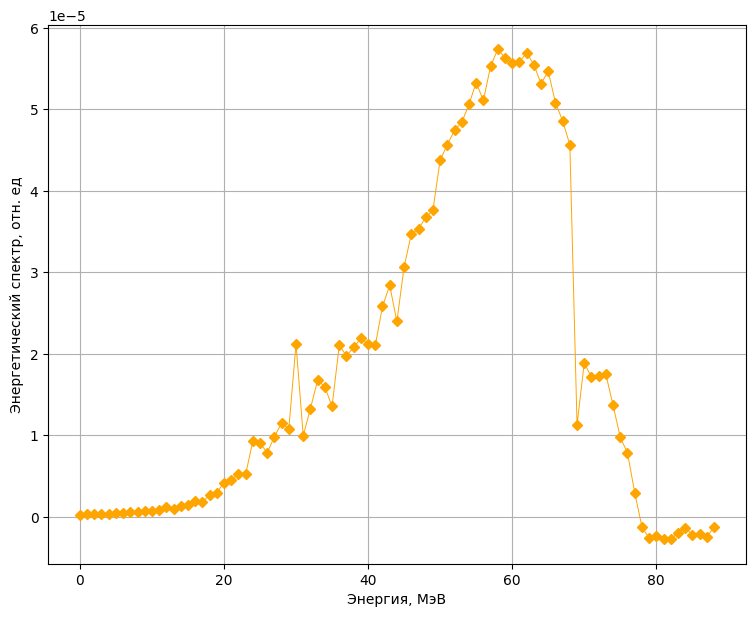

In [23]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(range(89), spectrums_signals[25][25], ls='-', marker='D', lw='0.7', ms=5, color='orange')

# настройки графика
ax.set_xlabel('Энергия, МэВ', fontsize=10)
ax.set_ylabel('Энергетический спектр, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1.e-5, 0.3e-4)
# ax.set_ylim(1e-7, 1.2)
ax.grid(True)

Скрипт

In [24]:
SP, DEV = [], []

for j in range(len(brems_e)):
    sp, dev = deconvolution_one_spectrum(brems_e[j], spectrums_signals[j])
    SP.append(sp)
    DEV.append(dev)
    print(f'ВЫПОЛНЕНО {j+1} из {len(brems_e)}')

(0), время: 0.0 секунд
(1), время: 4.38299 секунд
(2), время: 8.74896 секунд
(3), время: 13.23024 секунд
(4), время: 17.7115 секунд
(5), время: 21.98114 секунд
(6), время: 26.38526 секунд
(7), время: 31.02534 секунд
(8), время: 35.59538 секунд
(9), время: 40.10536 секунд
(10), время: 44.27407 секунд
(11), время: 48.31294 секунд
(12), время: 52.41489 секунд
(13), время: 56.72973 секунд
(14), время: 61.13069 секунд
(15), время: 65.3464 секунд
(16), время: 69.62367 секунд
(17), время: 74.38266 секунд
(18), время: 78.63009 секунд
(19), время: 82.81292 секунд
(20), время: 87.04774 секунд
(21), время: 91.59877 секунд
(22), время: 95.85066 секунд
(23), время: 100.1457 секунд
(24), время: 104.60497 секунд
(25), время: 109.1047 секунд
(26), время: 113.56456 секунд
(27), время: 118.03315 секунд
(28), время: 122.62677 секунд
(29), время: 127.18789 секунд
(30), время: 132.51 секунд
(31), время: 136.913 секунд
(32), время: 141.53156 секунд
(33), время: 146.64679 секунд
(34), время: 151.85649 секунд

(25), время: 140.79889 секунд
(26), время: 145.60742 секунд
(27), время: 150.12344 секунд
(28), время: 154.66435 секунд
(29), время: 159.15376 секунд
(30), время: 163.69723 секунд
(31), время: 168.89412 секунд
(32), время: 173.98635 секунд
(33), время: 179.04546 секунд
(34), время: 184.12265 секунд
(35), время: 189.08091 секунд
(36), время: 193.5904 секунд
(37), время: 198.37304 секунд
(38), время: 203.35341 секунд
(39), время: 208.1194 секунд
(40), время: 213.14666 секунд
(41), время: 217.40357 секунд
(42), время: 221.58751 секунд
(43), время: 225.73107 секунд
(44), время: 229.89787 секунд
(45), время: 234.17839 секунд
(46), время: 238.92514 секунд
(47), время: 243.74535 секунд
(48), время: 248.0061 секунд
(49), время: 252.27215 секунд
(50), время: 256.54134 секунд
ВЫПОЛНЕНО 6 из 50
(0), время: 0.0 секунд
(1), время: 4.68865 секунд
(2), время: 9.60124 секунд
(3), время: 14.54509 секунд
(4), время: 19.50928 секунд
(5), время: 24.15172 секунд
(6), время: 28.32236 секунд
(7), время: 32.4

(48), время: 236.10053 секунд
(49), время: 240.46117 секунд
(50), время: 244.72085 секунд
ВЫПОЛНЕНО 11 из 50
(0), время: 0.0 секунд
(1), время: 4.3032 секунд
(2), время: 8.68456 секунд
(3), время: 13.13599 секунд
(4), время: 17.61304 секунд
(5), время: 21.78061 секунд
(6), время: 25.93419 секунд
(7), время: 29.96927 секунд
(8), время: 34.0318 секунд
(9), время: 38.44966 секунд
(10), время: 42.6634 секунд
(11), время: 46.89377 секунд
(12), время: 51.60857 секунд
(13), время: 56.27095 секунд
(14), время: 61.75915 секунд
(15), время: 67.23595 секунд
(16), время: 72.27764 секунд
(17), время: 77.56068 секунд
(18), время: 82.67934 секунд
(19), время: 87.4159 секунд
(20), время: 91.95785 секунд
(21), время: 96.98577 секунд
(22), время: 102.10586 секунд
(23), время: 107.30145 секунд
(24), время: 112.77792 секунд
(25), время: 118.00058 секунд
(26), время: 122.45905 секунд
(27), время: 127.14631 секунд
(28), время: 131.7989 секунд
(29), время: 136.45369 секунд
(30), время: 141.03438 секунд
(31),

(21), время: 97.07392 секунд
(22), время: 101.43649 секунд
(23), время: 105.84569 секунд
(24), время: 110.25922 секунд
(25), время: 114.79329 секунд
(26), время: 119.35259 секунд
(27), время: 124.33509 секунд
(28), время: 129.36273 секунд
(29), время: 134.10647 секунд
(30), время: 139.15271 секунд
(31), время: 144.29298 секунд
(32), время: 149.3722 секунд
(33), время: 154.49811 секунд
(34), время: 159.64361 секунд
(35), время: 164.77213 секунд
(36), время: 169.84713 секунд
(37), время: 174.64145 секунд
(38), время: 179.20969 секунд
(39), время: 184.08406 секунд
(40), время: 188.8598 секунд
(41), время: 193.58463 секунд
(42), время: 198.25151 секунд
(43), время: 202.82088 секунд
(44), время: 207.34301 секунд
(45), время: 212.15182 секунд
(46), время: 217.93415 секунд
(47), время: 222.2876 секунд
(48), время: 226.4887 секунд
(49), время: 230.64331 секунд
(50), время: 234.66192 секунд
ВЫПОЛНЕНО 17 из 50
(0), время: 0.0 секунд
(1), время: 4.08759 секунд
(2), время: 8.26962 секунд
(3), врем

(44), время: 203.99764 секунд
(45), время: 208.05178 секунд
(46), время: 212.03748 секунд
(47), время: 215.96569 секунд
(48), время: 219.86687 секунд
(49), время: 224.0039 секунд
(50), время: 228.06928 секунд
ВЫПОЛНЕНО 22 из 50
(0), время: 0.0 секунд
(1), время: 4.29637 секунд
(2), время: 9.18971 секунд
(3), время: 14.18046 секунд
(4), время: 19.17371 секунд
(5), время: 24.34968 секунд
(6), время: 30.21022 секунд
(7), время: 35.55472 секунд
(8), время: 40.34577 секунд
(9), время: 45.20744 секунд
(10), время: 49.22097 секунд
(11), время: 53.88195 секунд
(12), время: 58.15021 секунд
(13), время: 62.653 секунд
(14), время: 67.00233 секунд
(15), время: 71.31555 секунд
(16), время: 75.56579 секунд
(17), время: 80.47928 секунд
(18), время: 84.77072 секунд
(19), время: 88.98663 секунд
(20), время: 93.32579 секунд
(21), время: 98.22684 секунд
(22), время: 103.32316 секунд
(23), время: 108.40807 секунд
(24), время: 113.61145 секунд
(25), время: 118.63222 секунд
(26), время: 123.74653 секунд
(27

(15), время: 146.22708 секунд
(16), время: 160.10044 секунд
(17), время: 176.16688 секунд
(18), время: 191.13887 секунд
(19), время: 205.76398 секунд
(20), время: 218.64908 секунд
(21), время: 227.22615 секунд
(22), время: 235.15919 секунд
(23), время: 242.98951 секунд
(24), время: 250.86241 секунд
(25), время: 258.61834 секунд
(26), время: 266.36582 секунд
(27), время: 275.17605 секунд
(28), время: 283.162 секунд
(29), время: 291.46573 секунд
(30), время: 299.63239 секунд
(31), время: 307.88923 секунд
(32), время: 316.058 секунд
(33), время: 324.03098 секунд
(34), время: 332.20693 секунд
(35), время: 340.4275 секунд
(36), время: 348.62291 секунд
(37), время: 356.6772 секунд
(38), время: 364.77394 секунд
(39), время: 372.24038 секунд
(40), время: 380.0228 секунд
(41), время: 387.76389 секунд
(42), время: 394.84153 секунд
(43), время: 402.20278 секунд
(44), время: 408.89296 секунд
(45), время: 415.35001 секунд
(46), время: 420.96342 секунд
(47), время: 426.42197 секунд
(48), время: 431.

(36), время: 386.17816 секунд
(37), время: 394.60504 секунд
(38), время: 403.37209 секунд
(39), время: 411.73549 секунд
(40), время: 419.21786 секунд
(41), время: 427.34774 секунд
(42), время: 434.85999 секунд
(43), время: 442.10581 секунд
(44), время: 449.21551 секунд
(45), время: 456.90838 секунд
(46), время: 464.89431 секунд
(47), время: 473.52922 секунд
(48), время: 482.97041 секунд
(49), время: 494.60623 секунд
(50), время: 507.67438 секунд
ВЫПОЛНЕНО 33 из 50
(0), время: 0.0 секунд
(1), время: 4.07933 секунд
(2), время: 8.28097 секунд
(3), время: 12.52377 секунд
(4), время: 16.75601 секунд
(5), время: 20.77933 секунд
(6), время: 24.7236 секунд
(7), время: 28.68803 секунд
(8), время: 34.16655 секунд
(9), время: 41.68326 секунд
(10), время: 49.84643 секунд
(11), время: 58.60184 секунд
(12), время: 67.32862 секунд
(13), время: 76.84723 секунд
(14), время: 86.92811 секунд
(15), время: 97.78337 секунд
(16), время: 109.41515 секунд
(17), время: 121.53558 секунд
(18), время: 133.85104 се

(8), время: 17.11659 секунд
(9), время: 19.27617 секунд
(10), время: 21.59738 секунд
(11), время: 24.02752 секунд
(12), время: 26.81255 секунд
(13), время: 29.36282 секунд
(14), время: 31.79033 секунд
(15), время: 34.27125 секунд
(16), время: 36.79018 секунд
(17), время: 39.52927 секунд
(18), время: 42.43005 секунд
(19), время: 45.28287 секунд
(20), время: 48.54546 секунд
(21), время: 52.8309 секунд
(22), время: 58.19607 секунд
(23), время: 64.36529 секунд
(24), время: 72.38228 секунд
(25), время: 79.13107 секунд
(26), время: 86.12807 секунд
(27), время: 93.3018 секунд
(28), время: 100.5501 секунд
(29), время: 107.86069 секунд
(30), время: 115.20899 секунд
(31), время: 122.75105 секунд
(32), время: 130.36713 секунд
(33), время: 138.05384 секунд
(34), время: 145.86261 секунд
(35), время: 153.78863 секунд
(36), время: 161.71652 секунд
(37), время: 169.64828 секунд
(38), время: 177.64541 секунд
(39), время: 185.61435 секунд
(40), время: 193.60657 секунд
(41), время: 201.61399 секунд
(42),

(34), время: 79.35355 секунд
(35), время: 81.87574 секунд
(36), время: 84.28286 секунд
(37), время: 86.60946 секунд
(38), время: 88.9537 секунд
(39), время: 91.22027 секунд
(40), время: 93.45608 секунд
(41), время: 95.71284 секунд
(42), время: 97.95298 секунд
(43), время: 100.16833 секунд
(44), время: 102.36866 секунд
(45), время: 104.56642 секунд
(46), время: 106.74385 секунд
(47), время: 108.92228 секунд
(48), время: 111.07272 секунд
(49), время: 113.28788 секунд
(50), время: 115.51164 секунд
ВЫПОЛНЕНО 44 из 50
(0), время: 0.0 секунд
(1), время: 2.23903 секунд
(2), время: 4.37548 секунд
(3), время: 6.44507 секунд
(4), время: 8.53778 секунд
(5), время: 10.62214 секунд
(6), время: 12.74129 секунд
(7), время: 15.62887 секунд
(8), время: 18.87683 секунд
(9), время: 21.17368 секунд
(10), время: 23.38013 секунд
(11), время: 25.57441 секунд
(12), время: 27.82758 секунд
(13), время: 30.03653 секунд
(14), время: 32.24462 секунд
(15), время: 34.42533 секунд
(16), время: 36.59964 секунд
(17), в

(11), время: 23.36742 секунд
(12), время: 25.64915 секунд
(13), время: 27.97502 секунд
(14), время: 30.2639 секунд
(15), время: 32.60054 секунд
(16), время: 34.89998 секунд
(17), время: 37.24486 секунд
(18), время: 39.55792 секунд
(19), время: 41.89329 секунд
(20), время: 44.22355 секунд
(21), время: 46.56028 секунд
(22), время: 48.90649 секунд
(23), время: 51.29727 секунд
(24), время: 53.76886 секунд
(25), время: 56.27886 секунд
(26), время: 58.77798 секунд
(27), время: 61.27528 секунд
(28), время: 63.71232 секунд
(29), время: 66.14971 секунд
(30), время: 68.51304 секунд
(31), время: 70.85011 секунд
(32), время: 73.23788 секунд
(33), время: 75.61541 секунд
(34), время: 78.03426 секунд
(35), время: 80.49613 секунд
(36), время: 82.81114 секунд
(37), время: 85.02862 секунд
(38), время: 87.26827 секунд
(39), время: 89.39559 секунд
(40), время: 91.58423 секунд
(41), время: 93.69597 секунд
(42), время: 95.79201 секунд
(43), время: 97.91881 секунд
(44), время: 100.01168 секунд
(45), время: 1

Сохранение данных

In [25]:
np.save('Notebook_13_SP_ross.npy', SP)
np.save('Notebook_13_DEV_ross.npy', DEV)

Загрузка данных

Построение

In [26]:
from mpl_toolkits.mplot3d import Axes3D

In [27]:
len(DEV[0])

51

In [28]:
D = np.array(DEV)
X,Y = np.meshgrid(levels, beams_energyes)
X, Ylog = np.meshgrid(levels, np.log10(beams_energyes))
Xlog, Ylog = np.meshgrid(np.log10(levels), np.log10(beams_energyes))

In [29]:
import matplotlib.ticker as mticker

# My axis should display 10⁻¹ but you can switch to e-notation 1.00e+01
def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"  # remove int() if you don't use MaxNLocator
    # return f"{10**val:.2e}"      # e-Notation

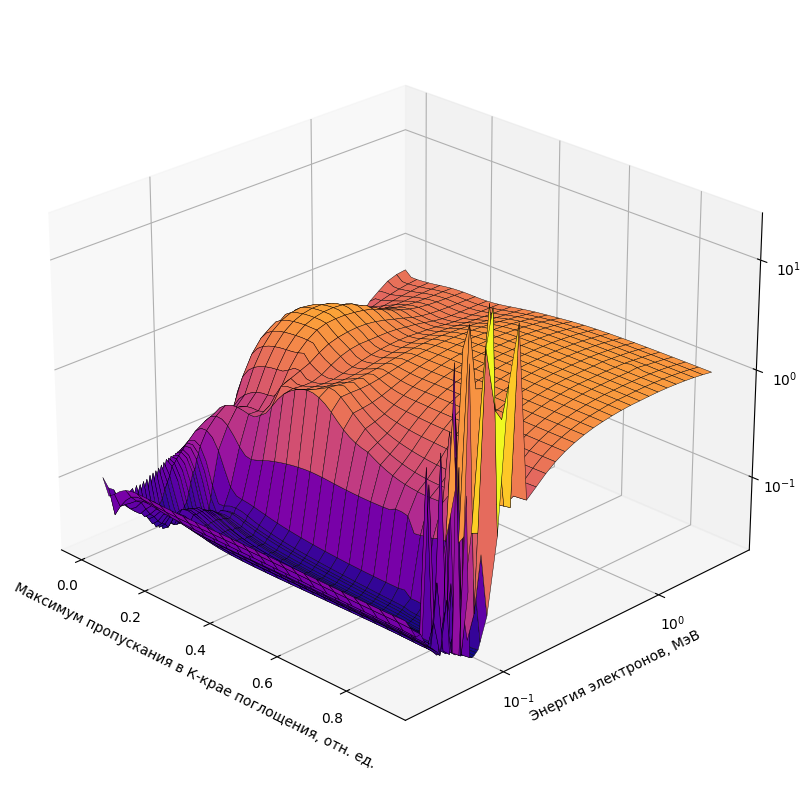

In [30]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': '3d'})
ax.plot_surface(X, Ylog, np.log10(D), cmap='plasma', linewidth=0.3, edgecolors='k', shade=True)

ax.set_xlabel('Максимум пропускания в К-крае поглощения, отн. ед.')
ax.set_ylabel('Энергия электронов, МэВ')
# ax.set_zlabel('Ср.кв. ошибка восстановления, отн. ед.')
fig.tight_layout()

ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))

ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# угол зрения (линейный)
# ax.view_init(elev=20, azim=-135)

# угол зрения (логарифм)
ax.view_init(elev=25, azim=-45)

# fig.savefig('Фильтры_Росса_3D_Материал30.jpg', bbox_inches='tight')

Контурная карта

In [31]:
linspace4 = np.geomspace(5e-3, 0.3, 15)
linspace5 = np.linspace(0.31, 2, 15)

In [32]:
c_map_levels = []
c_map_levels.extend(linspace4)
c_map_levels.extend(linspace5)

Text(0, 0.5, 'Энергия электронов, МэВ')

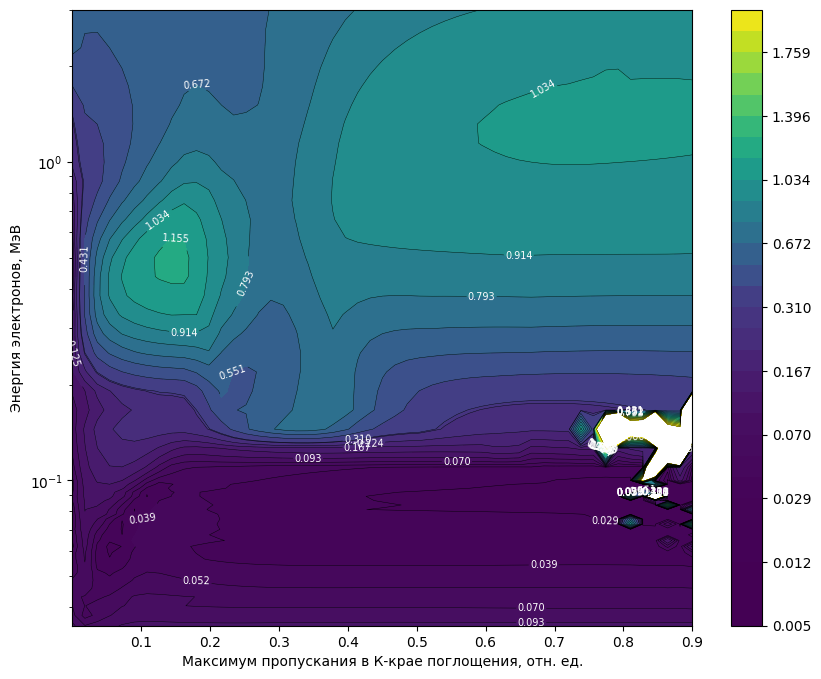

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))

c_map = ax.contourf(X, Y, D, levels=c_map_levels)
borders = ax.contour(X, Y, D, colors='k', levels=c_map_levels, linewidths=0.3)
ax.clabel(borders, fontsize=7, colors='w')
fig.colorbar(c_map)
# ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Максимум пропускания в К-крае поглощения, отн. ед.')
ax.set_ylabel('Энергия электронов, МэВ')

# fig.savefig('Фильтры_Росса_контурная_карта.jpg', bbox_inches='tight')

Зависимость минимальной ошибки восстановления от граничной энерии спектра

In [34]:
minimal_deviations = []

for i,val in enumerate(beams_energyes):
    min_value = min(DEV[i])
    minimal_deviations.append(min_value)

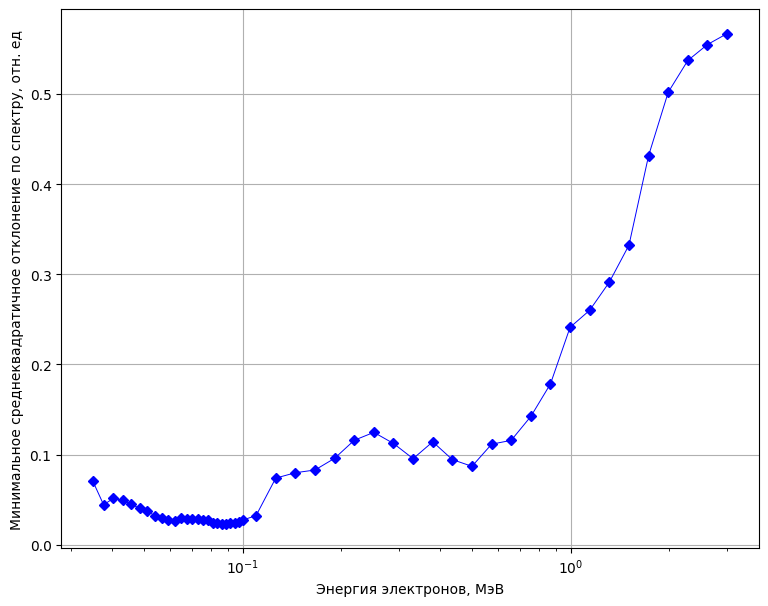

In [35]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(beams_energyes, minimal_deviations, ls='-', marker='D', lw='0.7', ms=5, color='blue')

# настройки графика
ax.set_xlabel('Энергия электронов, МэВ', fontsize=10)
ax.set_ylabel('Минимальное среднеквадратичное отклонение по спектру, отн. ед', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.grid(True)

# fig.savefig('Фильтры_Росса_минимум_ошибки_восстановления_от_энергии_электронов.jpg', bbox_inches='tight')